# Bias estimation

When we consider that we use a trained model for future predictions, logically, the training sample used is always imperfect. In most cases, it is not feasible to collect data from a complete population, and even it it was, in the future the population may change.

Suppose that the training set is representative sample for the learning task. If instead of this sample we had chosen another representative sample, we should arrive at a similar model with similar results. We can simulate this using the bootstrap method. When we repeatedly resample a training set using replacement, we should obtain close results every time, otherwise training is either suffering from high bias or high variance.

In [50]:
from ml import *
data = dam()

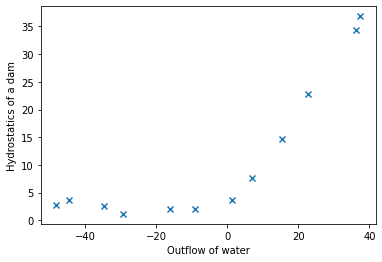

In [51]:
data.resample(None)
data.plot(marker = 'x')

By resampling the training set, we can fit the model on a subset of training items. By default, the size of the training set remains the same, but because it is resampled with replacement (which is what you should do when using bootstrapping), it is likely that a few points are selected multiple times and therefore some points are not.

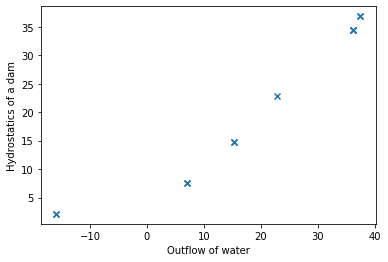

In [52]:
data.resample()
data.plot(marker = 'x')

We can then write a function, that repeats the experiment #bootstrap times, in `data.resample` the `n=0` means that the size of the training set remains the same. Same as in previous notebook, degree is set to fit a degree-order polynomial.

In [55]:
def fit_poly(degree=1, n=0, bootstrap=40, scale=False):
    data = dam(degree=degree, scale=scale)   # prepare the dataset to fit a degree-order polynomial
    
    data.plot(marker='x')       # plot the data
    plt.ylim((-10,50))          # set to ensure the plots use the same y-axis
    for _ in range(bootstrap):  # resample #bootstrap times
        data.resample(n)        # sample #n points with replacement from the original training set
        model = linear_regression_ne(data)
        model.train(verbose=False, bar=False) # turn off output to the console
        model.plot_line(dashes=[1, 2])

In the first experiment, we show the results for a linear model. By bootstrapping 40 linear models, we visualize the models are high in bias:
- On average, the distance between the model and the training items is high. 
- The models are congruent (similar in shape)
- the amount of red indicates variance in the learned parameters that is not erradic. This indicates high bias.

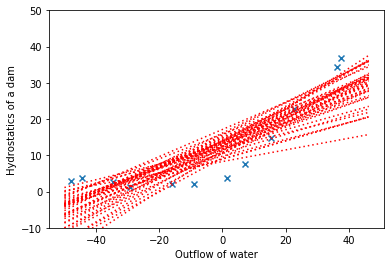

In [56]:
fit_poly(1)

Next we look at higher order functions. For a order-2 model we observe:
- On average, the distance between the model and the training items is lower. 
- The models are congruent (similar in shape)
- the lesser amount of red (compared to order-1) indicates less variance in the learned parameter, therefor less bias.

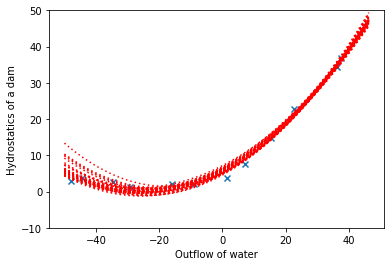

In [57]:
fit_poly(2)

An order-3 polynomial behaves similar to am order-2 model, but:
- in the middle region there appears to be less variance
- towards the end the variance is much higher, therefore we expect that extrapolation can yield worse results than an order-2 model.
- there may be slight incongruencies between the models, indicating first signs of overfitting

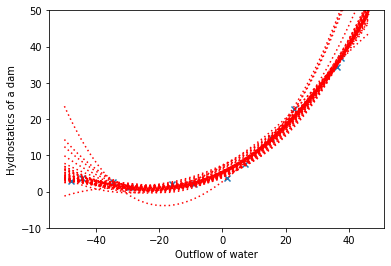

In [60]:
fit_poly(3)

On this dataset, an Order-4 polynomial is already a no-go zone:
- the models are more erradic and the congruency between models decreases -> overfitting.

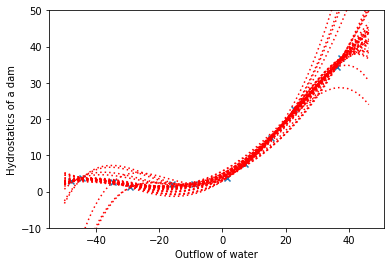

In [61]:
fit_poly(4)

Overfitting gets worse when we further increase the model complexity.

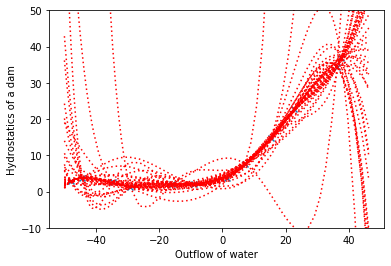

In [62]:
fit_poly(6)

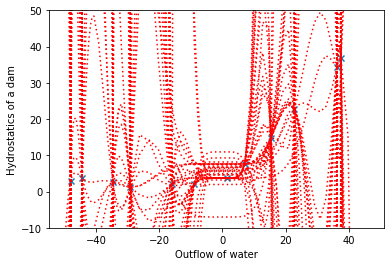

In [63]:
fit_poly(12)

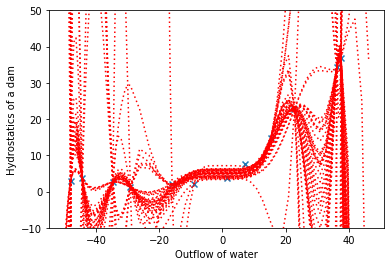

In [64]:
fit_poly(12, n=30)